# 2. 시그모이드 함수(Sigmoid function)

In [1]:
%matplotlib inline  # notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
import numpy as np  # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용

In [2]:
def sigmoid(x): # 시그모이드 함수 정의
    return 1/(1+np.exp(-x))

## 1) W가 1이고 b가 0인 그래프

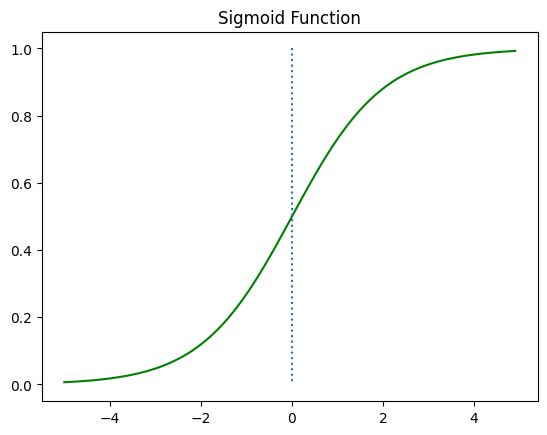

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y,'g')
plt.plot([0,0],[1.0,0.0],':')   # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

## 2) W값의 변화에 따른 경사도의 변화

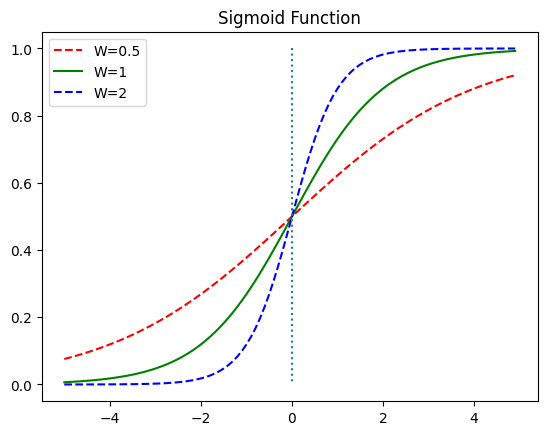

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--')    # W의 값이 0.5일때
plt.plot(x, y2, 'g')    # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--')    # W의 값이 2일 때
plt.plot([0,0],[1.0,0.0],':')   # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.legend(['W=0.5','W=1','W=2'])
plt.show()

## 3) b값의 변화에 따른 좌,우 이동

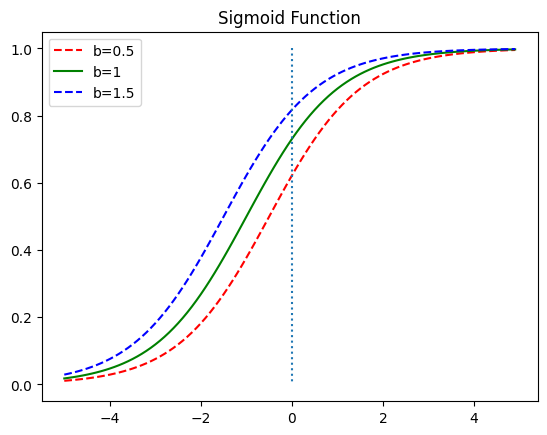

In [12]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x + 0.5)
y2 = sigmoid(x + 1)
y3 = sigmoid(x + 1.5)

plt.plot(x, y1, 'r', linestyle='--')    # x + 0.5
plt.plot(x, y2, 'g')    # x + 1
plt.plot(x, y3, 'b', linestyle='--')    # x + 1.5
plt.plot([0,0],[1.0,0.0],':')   # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.legend(['b=0.5','b=1','b=1.5'])
plt.show()

# 4. 파이토치로 로지스틱 회귀 구현하기

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [14]:
torch.manual_seed(1)

In [15]:
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [16]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [17]:
W = torch.zeros((2,1), requires_grad=True)  # 크기는 2x1
b = torch.zeros(1, requires_grad=True)

In [18]:
hypothesis = 1 / (1+torch.exp(-(x_train.matmul(W) + b)))

In [20]:
print(hypothesis)   # 예측값인 H(x) 출력

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [21]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

In [22]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


In [23]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [27]:
# 한 원소에 대한 오차
-(y_train[0] * torch.log(hypothesis[0]) + (1-y_train[0]) * torch.log(1-hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward0>)

In [30]:
# 모든 원소에 대한 오차
losses = -(y_train * torch.log(hypothesis) + (1-y_train)*torch.log(1-hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [32]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [33]:
F.binary_cross_entropy(hypothesis,y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

***훈련 과정까지 추가한 전체 코드***

In [34]:
x_data = [[1,2],[2, 3],[3, 1], [4, 3],[5,3],[6,2]]
y_data = [[0],[0],[0],[0],[0],[0]]
x_train = torch.FloatTensor(x_data)
y_data = torch.FloatTensor(y_data)

In [36]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [37]:
# 모델 초기화
W = torch.zeros((2,1),requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W,b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train*torch.log(hypothesis) + (1-y_train)*torch.log(1-hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [38]:
hypotehsis = torch.sigmoid(x_train.matmul(W) + b)
print(hypotehsis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [39]:
prediction = hypotehsis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [40]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


# 04-02 nn.Module과 클래스로 구현하는 로지스틱 회귀

## 1. 파이토치의 nn.Linear와 nn.Sigmoid로 로지스틱 회귀 구현하기

In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [42]:
torch.manual_seed(1)

In [43]:
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [45]:
model = nn.Sequential(
    nn.Linear(2,1),  # input_dim=2, output_dim=1
    nn.Sigmoid()    # 출력은 시그모이드 함수를 거친다.
)

In [46]:
model(x_train)  # 랜덤으로 초기화된 W와 b를 가지고 있음

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [47]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 20 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train  # 실제값과 일치하는 경우만 True로 간주
        accuarcy = correct_prediction.sum().item() / len(correct_prediction)    # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuarcy {:2.2f}%'.format(   # 각 에포크마다 정확도 출력
            epoch, nb_epochs, cost.item(), accuarcy * 100
        ))

Epoch    0/1000 Cost: 0.539713 Accuarcy 83.33%
Epoch   20/1000 Cost: 0.441875 Accuarcy 66.67%
Epoch   40/1000 Cost: 0.316358 Accuarcy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuarcy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuarcy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuarcy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuarcy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuarcy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuarcy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuarcy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuarcy 100.00%
Epoch  220/1000 Cost: 0.074595 Accuarcy 100.00%
Epoch  240/1000 Cost: 0.069526 Accuarcy 100.00%
Epoch  260/1000 Cost: 0.065118 Accuarcy 100.00%
Epoch  280/1000 Cost: 0.061247 Accuarcy 100.00%
Epoch  300/1000 Cost: 0.057820 Accuarcy 100.00%
Epoch  320/1000 Cost: 0.054764 Accuarcy 100.00%
Epoch  340/1000 Cost: 0.052022 Accuarcy 100.00%
Epoch  360/1000 Cost: 0.049546 Accuarcy 100.00%
Epoch  380/1000 Cost: 0.047299 Accuarcy 100.00%
Epoch  400/1000 Cost: 0.045251 Accuarcy 100

In [48]:
model(x_train)

tensor([[2.7616e-04],
        [3.1595e-02],
        [3.8959e-02],
        [9.5624e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)

In [49]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]


## 3. 모델을 클래스로 구현하기

In [50]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

## 4. 로지스틱 회귀 클래스로 구현하기

In [59]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [60]:
torch.manual_seed(1)

In [61]:
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [62]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

model = BinaryClassifier()

In [63]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs=1000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 20 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == y_train  # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction)    # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, nb_epochs, cost.item(), accuracy * 100
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00%
Epoch  220/1000 Cost: 0.074595 Accuracy 100.00%
Epoch  240/1000 Cost: 0.069526 Accuracy 100.00%
Epoch  260/1000 Cost: 0.065118 Accuracy 100.00%
Epoch  280/1000 Cost: 0.061247 Accuracy 100.00%
Epoch  300/1000 Cost: 0.057820 Accuracy 100.00%
Epoch  320/1000 Cost: 0.054764 Accuracy 100.00%
Epoch  340/1000 Cost: 0.052022 Accuracy 100.00%
Epoch  360/1000 Cost: 0.049546 Accuracy 100.00%
Epoch  380/1000 Cost: 0.047299 Accuracy 100.00%
Epoch  400/1000 Cost: 0.045251 Accuracy 100